# Analysis of Covid-19 in ASEAN and World

#### by: Nadia Fitriana Latifah

### Project Overview
#### In this project, data was collected using the Covid-19 API through the website of https://covid19-api.org/ where the website is recapitulation of global data from Covid-19.
#### The aim of this project is to visualize a picture of the conditions of the Covid-19 spread case in ASEAN and around the world.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import datetime
import requests
import collections
import folium

#### Code function to get data from json

In [2]:
def get_json(api_url):
    response=requests.get(api_url)
    if response.status_code==200:
        return json.loads(response.content.decode('utf-8'))
    else:
        return None

#### The function of pd.io.json.json_normalize is used to get DataFrame of the Covid-19 and the function of get_json() is used to call the function that previously created. 

#### The fuction of datetime.date.today is used to take the data of latest Covid-19 API from all countries.

In [3]:
covid_url='https://covid19-api.org/api/status?date='+str(datetime.date.today())
df_covid_world=pd.io.json.json_normalize(get_json(covid_url))
df_covid_world.head()

<ipython-input-3-577e2f235bf2>:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df_covid_world=pd.io.json.json_normalize(get_json(covid_url))


,country,last_update,cases,deaths,recovered
0,US,2020-11-12T23:25:30,10523260,242577,3997204
1,IN,2020-11-12T23:25:30,8683916,128121,8066501
2,BR,2020-11-12T23:25:30,5747660,163368,5222937
3,FR,2020-11-12T23:25:30,1915282,42599,139212
4,RU,2020-11-12T23:25:30,1843678,31755,1378463


In [4]:
covid_total_url='https://covid19-api.org/api/timeline'
covid_total=pd.io.json.json_normalize(get_json(covid_total_url))
total_cases=covid_total['total_cases'][1]
total_deaths=covid_total['total_deaths'][1]

<ipython-input-4-50ed6d3499d3>:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  covid_total=pd.io.json.json_normalize(get_json(covid_total_url))


#### Getting Covid-19 data in country.

In [5]:
countries_url='https://covid19-api.org/api/countries'
df_countries=pd.io.json.json_normalize(get_json(countries_url))
df_countries=df_countries.rename(columns={'alpha2':'country','alpha3':'country_code'})
[['name','country','latitude','longitude','country_code']]

df_countries

<ipython-input-5-02b99ccb7a5c>:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df_countries=pd.io.json.json_normalize(get_json(countries_url))


,name,country,country_code,numeric,latitude,longitude
0,Afghanistan,AF,AFG,004,33.000000,65.000000
1,Albania,AL,ALB,008,41.000000,20.000000
2,Algeria,DZ,DZA,012,28.000000,3.000000
3,Andorra,AD,AND,020,42.500000,1.500000
4,Angola,AO,AGO,024,-12.500000,18.500000
...,...,...,...,...,...,...
204,Viet Nam,VN,VNM,704,16.166667,107.833333
205,Western Sahara,EH,ESH,732,24.500000,-13.000000
206,Yemen,YE,YEM,887,15.000000,48.000000
207,Zambia,ZM,ZMB,894,-15.000000,30.000000


In [6]:
df_countries.shape

(209, 6)

In [7]:
df_countries.head()

,name,country,country_code,numeric,latitude,longitude
0,Afghanistan,AF,AFG,004,33.0,65.0
1,Albania,AL,ALB,008,41.0,20.0
2,Algeria,DZ,DZA,012,28.0,3.0
3,Andorra,AD,AND,020,42.5,1.5
4,Angola,AO,AGO,024,-12.5,18.5


#### Merge of 2 DataFrame.

In [8]:
df_covid_denormalize=pd.merge(df_covid_world, df_countries, on='country')
df_covid_denormalize

,country,last_update,cases,deaths,recovered,name,country_code,numeric,latitude,longitude
0,US,2020-11-12T23:25:30,10523260,242577,3997204,United States of America,USA,840,38.000000,-97.000000
1,IN,2020-11-12T23:25:30,8683916,128121,8066501,India,IND,356,20.000000,77.000000
2,BR,2020-11-12T23:25:30,5747660,163368,5222937,Brazil,BRA,076,-10.000000,-55.000000
3,FR,2020-11-12T23:25:30,1915282,42599,139212,France,FRA,250,46.000000,2.000000
4,RU,2020-11-12T23:25:30,1843678,31755,1378463,Russian Federation,RUS,643,60.000000,100.000000
...,...,...,...,...,...,...,...,...,...,...
204,GG,2020-03-17T18:33:03,0,0,0,Guernsey,GGY,831,49.466667,-2.583333
205,GL,2020-03-19T09:33:04,0,0,0,Greenland,GRL,304,72.000000,-40.000000
206,GU,2020-03-18T19:14:33,0,0,0,Guam,GUM,316,13.466667,144.783333
207,JE,2020-03-17T18:33:03,0,0,0,Jersey,JEY,832,49.250000,-2.166667


In [9]:
df_covid_denormalize.shape

(209, 10)

In [10]:
df_covid_denormalize.head()

,country,last_update,cases,deaths,recovered,name,country_code,numeric,latitude,longitude
0,US,2020-11-12T23:25:30,10523260,242577,3997204,United States of America,USA,840,38.0,-97.0
1,IN,2020-11-12T23:25:30,8683916,128121,8066501,India,IND,356,20.0,77.0
2,BR,2020-11-12T23:25:30,5747660,163368,5222937,Brazil,BRA,076,-10.0,-55.0
3,FR,2020-11-12T23:25:30,1915282,42599,139212,France,FRA,250,46.0,2.0
4,RU,2020-11-12T23:25:30,1843678,31755,1378463,Russian Federation,RUS,643,60.0,100.0


#### Below is a visualization of the 20 countries with the highest cases of Covid-19 in the world.

In [11]:
df_high_cases_countries=df_covid_denormalize.sort_values(by='cases', ascending=False).reset_index()
df_high_20_cases_countries=df_high_cases_countries.head(20).append(df_high_cases_countries[df_high_cases_countries['country']=='ID'])
df_high_20_cases_countries

,index,country,last_update,cases,deaths,recovered,name,country_code,numeric,latitude,longitude
0,0,US,2020-11-12T23:25:30,10523260,242577,3997204,United States of America,USA,840,38.000000,-97.000000
1,1,IN,2020-11-12T23:25:30,8683916,128121,8066501,India,IND,356,20.000000,77.000000
2,2,BR,2020-11-12T23:25:30,5747660,163368,5222937,Brazil,BRA,076,-10.000000,-55.000000
3,3,FR,2020-11-12T23:25:30,1915282,42599,139212,France,FRA,250,46.000000,2.000000
4,4,RU,2020-11-12T23:25:30,1843678,31755,1378463,Russian Federation,RUS,643,60.000000,100.000000
5,5,ES,2020-11-12T23:25:30,1437220,40461,150376,Spain,ESP,724,40.000000,-4.000000
6,6,GB,2020-11-12T23:25:30,1293715,51020,3031,United Kingdom of Great Britain and Northern I...,GBR,826,54.000000,-2.000000
7,7,AR,2020-11-12T23:25:30,1284519,34782,1100180,Argentina,ARG,032,-34.000000,-64.000000
8,8,CO,2020-11-12T23:25:30,1174012,33491,1081691,Colombia,COL,170,4.000000,-72.000000
9,9,IT,2020-11-12T23:25:30,1066401,43589,387758,Italy,ITA,380,42.833333,12.833333


#### Getting json data for Geo.

In [12]:
country_geo_url='https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/world-countries.json'
df_geo=pd.io.json.json_normalize(get_json(country_geo_url))
df_geo=list(list(df_geo['features'])[0])

<ipython-input-12-6a6e4ae9fb6b>:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df_geo=pd.io.json.json_normalize(get_json(country_geo_url))


In [13]:
df_geo_high_cases=[]
for country in df_geo:
    if country['properties']['name']=='United States':
        country['properties']['name']='United States of America'
    if country['properties']['name'] in list(df_high_20_cases_countries['name']):
        df_geo_high_cases.append(country)
geo_data={'type':'FeatureCollection','features':df_geo_high_cases}

#### Creating of chart map.

In [14]:
last_time_update=str(datetime.date.today()-datetime.timedelta(1))
world=folium.Map( location=[0,0],zoom_start=2)
choropleth=folium.Choropleth(geo_data=geo_data, data=df_high_20_cases_countries,
             columns=['country_code','cases'],
             key_on='feature.id',                
             fill_color='YlGn',
             fill_opacity=0.7,
             line_opacity=0.2,
             legend_name="Cases").add_to(world)

for i in range(len(df_high_20_cases_countries)):  
    data=df_high_20_cases_countries.iloc[i]
    label_country="""<div style='text-align:center;'>
                    <p style='margin-bottom:-20px;font-size:8pt;font-weight:bold;color:balck;'>{}. {} </p><br>
                    <span style='font-size:8pt;background:White;padding:1px'>{:,}</span>
                    </div>""".format(data['index']+1, data['name'], data['cases'])
    choropleth.geojson.add_child(
    folium.Marker(
            [data['latitude'], data['longitude']],
            icon=folium.DivIcon(html =label_country ,icon_size=(200,36),icon_anchor=(80,0)
        )
            )
        )
label_total_value="""
<div style='background:white; text-align:center; padding:-10px;border-radius:5px'>
<h3 style='margin:-10px;color:DarkCyan'>Total Cases</h3>
<h4 style=' margin-bottom:0px'>{:,}</h4>
<p style='color:maroon';>Deaths  {:,} </p>
</div>
<p style='opacity:.7; margin-top:-10px; font-size:8pt'>last updated | {}</p>
""".format(total_cases, total_deaths, last_time_update)
choropleth.geojson.add_child(

    folium.Marker(
            [-50, -130],
            icon=folium.DivIcon(html =label_total_value,icon_size=(136,36)
        )
            )
        )
world.save('high_20_cases_cvodi19.html')
world

#### Below is a visualization of the highest fatality rate in country.

In [15]:
df_covid_denormalize['fatality_ratio(%)']=round((df_covid_denormalize['deaths']/df_covid_denormalize['cases'])*100, 2)
df_covid_denormalize=df_covid_denormalize.replace(['United Kingdom of Great Britain and Northern Ireland'], 'United Kingdom')

#### 20 countries with the highest fatality rate.

In [16]:
columns=['country','last_update','name', 'cases', 'deaths', 'recovered', 'fatality_ratio(%)']
df_high_20_fatality_rate =df_covid_denormalize.sort_values(by='fatality_ratio(%)', ascending=False)[columns].head(20)
df_high_20_fatality_rate

,country,last_update,name,cases,deaths,recovered,fatality_ratio(%)
152,YE,2020-11-12T23:25:30,Yemen,2071,605,1394,29.21
192,EH,2020-11-12T23:25:30,Western Sahara,10,1,8,10.00
10,MX,2020-11-12T23:25:30,Mexico,986177,96430,731468,9.78
104,SD,2020-11-12T23:25:30,Sudan,14401,1116,9535,7.75
36,EC,2020-11-12T23:25:30,Ecuador,177513,12946,154956,7.29
155,TD,2020-11-12T23:25:30,Chad,1578,100,1428,6.34
39,BO,2020-11-12T23:25:30,Plurinational State of Bolivia,142776,8818,115718,6.18
53,EG,2020-11-12T23:25:30,Egypt,110095,6417,100760,5.83
183,FJ,2020-11-12T23:25:30,Fiji,35,2,32,5.71
156,LR,2020-11-12T23:25:30,Liberia,1468,82,1312,5.59


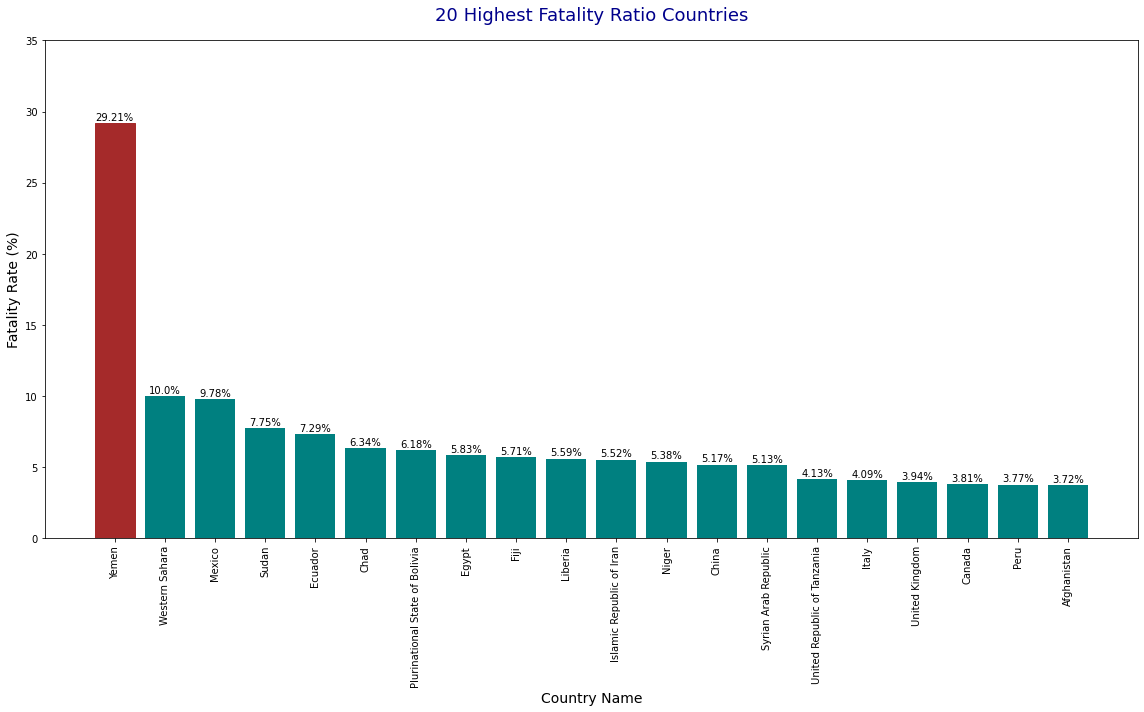

In [17]:
plt.figure(figsize=(16, 10))
x=df_high_20_fatality_rate['name']
y=df_high_20_fatality_rate['fatality_ratio(%)']
bar=plt.bar(x,y, color='teal')
bar[0].set_color('brown')
plt.xlabel('Country Name', fontsize=14)
plt.ylabel('Fatality Rate (%)', fontsize=14)
plt.title('20 Highest Fatality Ratio Countries', color='DarkBlue', fontsize=18, pad=20)
plt.xticks(rotation=90)
plt.ylim(0,35)
plt.tight_layout()

def autolabel(rects):
    for rect in rects:
        height=rect.get_height()
        plt.annotate('{}%'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 1),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bar)
plt.savefig('20 Highest fatality rate.png', bbox_inches='tight')
plt.show()

## Analysis of Covid-19 in ASEAN
#### Function of new cases.

In [18]:
def get_value_new(df_timeline_covid, value_name):
    value_new=[]
    for i in (range(len(df_timeline_covid))):
        if i==len(df_timeline_covid)-1:
            value_new.append(df_timeline_covid.iloc[i][value_name])
        else:
            new=int(df_timeline_covid.iloc[i][value_name] - df_timeline_covid.iloc[i+1][value_name])
            value_new.append(new)
    return value_new

In [19]:
#ASEAN countries
countries=['ID','MY','SG','TH','VN','PH', 'MM', 'BN','LA']
i=0
for country in countries:
    timeline_covid_url='https://covid19-api.org/api/timeline/'+country
    df_timeline_covid=pd.io.json.json_normalize(get_json(timeline_covid_url))  
    df_timeline_covid['last_update']=pd.to_datetime(df_timeline_covid['last_update'], format='%Y-%m-%d %H:%M:%S')
    df_timeline_covid['last_update']=df_timeline_covid['last_update'].apply(lambda x: x.date())
    df_timeline_covid['new_cases']=get_value_new(df_timeline_covid, 'cases')
    df_timeline_covid['new_deaths']=get_value_new(df_timeline_covid, 'deaths')
    df_timeline_covid['new_recovered']=get_value_new(df_timeline_covid, 'recovered')
    df_timeline_covid=df_timeline_covid[df_timeline_covid['last_update'] < datetime.date.today()]
    if i==0:
        df_timeline_covid_merged=df_timeline_covid
    else:
        df_timeline_covid_merged=df_timeline_covid.append(df_timeline_covid_merged, ignore_index=True)
    i=i+1
    
df_timeline_covid_merged

<ipython-input-19-49f6f877677b>:6: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df_timeline_covid=pd.io.json.json_normalize(get_json(timeline_covid_url))


,country,last_update,cases,deaths,recovered,new_cases,new_deaths,new_recovered
0,LA,2020-11-12,24,0,23,0,0,0
1,LA,2020-11-11,24,0,23,0,0,0
2,LA,2020-11-10,24,0,23,0,0,0
3,LA,2020-11-09,24,0,23,0,0,0
4,LA,2020-11-08,24,0,23,0,0,0
...,...,...,...,...,...,...,...,...
2324,ID,2020-03-10,27,0,2,8,0,2
2325,ID,2020-03-09,19,0,0,13,0,0
2326,ID,2020-03-08,6,0,0,2,0,0
2327,ID,2020-03-06,4,0,0,2,0,0


In [20]:
df_timeline_covid_merged.shape

(2329, 8)

In [21]:
df_timeline_covid_merged.head()

,country,last_update,cases,deaths,recovered,new_cases,new_deaths,new_recovered
0,LA,2020-11-12,24,0,23,0,0,0
1,LA,2020-11-11,24,0,23,0,0,0
2,LA,2020-11-10,24,0,23,0,0,0
3,LA,2020-11-09,24,0,23,0,0,0
4,LA,2020-11-08,24,0,23,0,0,0


#### Merge DataFrame of df_timeline_covid_merged with df_countries

In [22]:
df_timeline_covid_denormalize=pd.merge(df_timeline_covid_merged, df_countries, on='country')
df_timeline_covid_denormalize

,country,last_update,cases,deaths,recovered,new_cases,new_deaths,new_recovered,name,country_code,numeric,latitude,longitude
0,LA,2020-11-12,24,0,23,0,0,0,Lao People's Democratic Republic,LAO,418,18.0,105.0
1,LA,2020-11-11,24,0,23,0,0,0,Lao People's Democratic Republic,LAO,418,18.0,105.0
2,LA,2020-11-10,24,0,23,0,0,0,Lao People's Democratic Republic,LAO,418,18.0,105.0
3,LA,2020-11-09,24,0,23,0,0,0,Lao People's Democratic Republic,LAO,418,18.0,105.0
4,LA,2020-11-08,24,0,23,0,0,0,Lao People's Democratic Republic,LAO,418,18.0,105.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2324,ID,2020-03-10,27,0,2,8,0,2,Indonesia,IDN,360,-5.0,120.0
2325,ID,2020-03-09,19,0,0,13,0,0,Indonesia,IDN,360,-5.0,120.0
2326,ID,2020-03-08,6,0,0,2,0,0,Indonesia,IDN,360,-5.0,120.0
2327,ID,2020-03-06,4,0,0,2,0,0,Indonesia,IDN,360,-5.0,120.0


In [23]:
df_timeline_covid_denormalize.shape

(2329, 13)

In [24]:
df_timeline_covid_denormalize.tail()

,country,last_update,cases,deaths,recovered,new_cases,new_deaths,new_recovered,name,country_code,numeric,latitude,longitude
2324,ID,2020-03-10,27,0,2,8,0,2,Indonesia,IDN,360,-5.0,120.0
2325,ID,2020-03-09,19,0,0,13,0,0,Indonesia,IDN,360,-5.0,120.0
2326,ID,2020-03-08,6,0,0,2,0,0,Indonesia,IDN,360,-5.0,120.0
2327,ID,2020-03-06,4,0,0,2,0,0,Indonesia,IDN,360,-5.0,120.0
2328,ID,2020-03-02,2,0,0,2,0,0,Indonesia,IDN,360,-5.0,120.0


In [25]:
df_timeline_covid_denormalize=df_timeline_covid_denormalize.replace(["Lao People's Democratic Republic"], 'Laos')

#### Creating of Bar Chart.

<Figure size 432x288 with 0 Axes>

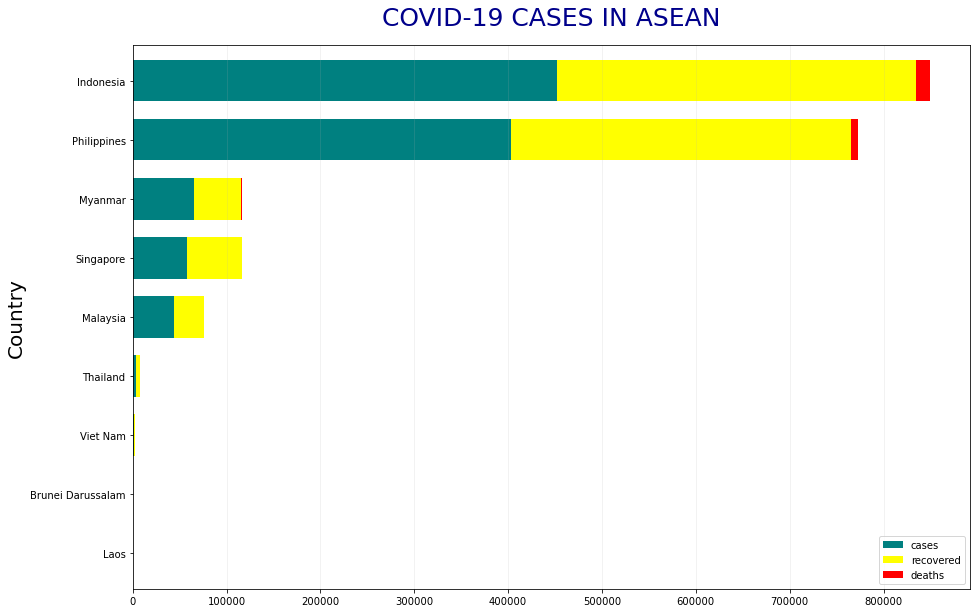

In [26]:
last_update=datetime.date.today()-datetime.timedelta(1)
plt.clf()
df_update_cases_covid=df_timeline_covid_denormalize[df_timeline_covid_denormalize['last_update'] == last_update].sort_values(by='cases', ascending=True)[['name', 'cases','recovered', 'deaths']]
ax = df_update_cases_covid.plot.barh(x='name', stacked=True, align='center',width=.7, color=['teal','yellow', 'red']);

ax.figure.set_size_inches(15,10)
ax.set_title("COVID-19 CASES IN ASEAN", color='DarkBlue', fontsize=25, pad= 20)

plt.ylabel('Country', fontsize=20)
ax.legend(loc='lower right')
plt.grid(axis='x', alpha=0.2)
plt.savefig('Covid-19 Cases in ASEAN.png', bbox_inches='tight')
plt.show()

In [27]:
df_covid_denormalize=df_covid_denormalize.replace(["Lao People's Democratic Republic"], 'Laos')

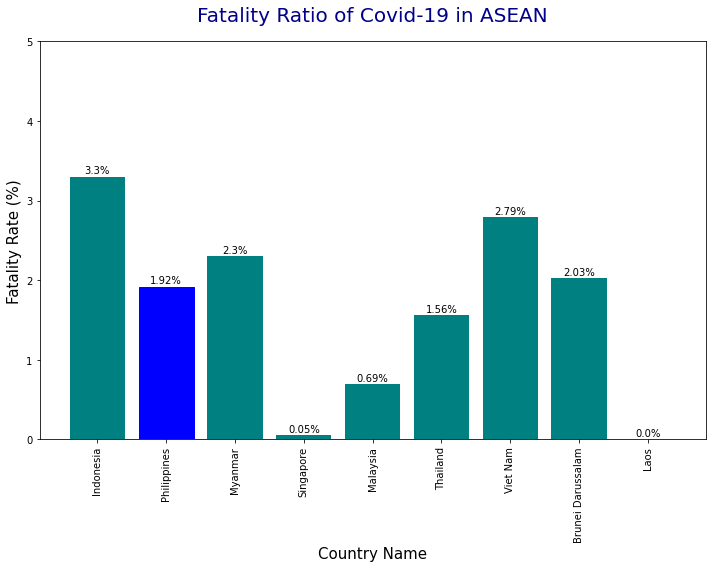

In [28]:
plt.figure(figsize=(10,8))
data_country=df_covid_denormalize['country'].isin(countries)
x=df_covid_denormalize[data_country]['name']
y=df_covid_denormalize[data_country]['fatality_ratio(%)']
bar=plt.bar(x,y, color='teal')
bar[1].set_color('blue')
plt.xlabel('Country Name', fontsize=15)
plt.ylabel('Fatality Rate (%)', fontsize=15)
plt.title('Fatality Ratio of Covid-19 in ASEAN', color='DarkBlue', fontsize=20, pad=20)
plt.xticks(rotation=90)
plt.ylim(0,5)
plt.tight_layout()

def autolabel(rects):
    for rect in rects:
        height=rect.get_height()
        plt.annotate('{}%'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 1),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bar)
plt.savefig('fatality rate of covid-19 in ASEAN.png', bbox_inches='tight')
plt.show()

#### Below is the visualization of the 5 highest Covid-19 cases in ASEAN countries.

In [29]:
last_update=datetime.date.today() - datetime.timedelta(1)
high5_countries=df_timeline_covid_denormalize[df_timeline_covid_merged['last_update'] == last_update].sort_values(by='cases', ascending=False).head(5)['name']
high5_timeline_covid_merged = df_timeline_covid_denormalize[df_timeline_covid_denormalize['name'].isin(high5_countries) ].sort_values(by=['last_update','cases'], ascending=False)
high5_timeline_covid_merged.head()

,country,last_update,cases,deaths,recovered,new_cases,new_deaths,new_recovered,name,country_code,numeric,latitude,longitude
2078,ID,2020-11-12,452291,14933,382084,4173,97,3102,Indonesia,IDN,360,-5.000000,120.0
713,PH,2020-11-12,402820,7721,362417,1404,11,200,Philippines,PHL,608,13.000000,122.0
482,MM,2020-11-12,65598,1508,49563,1145,28,1031,Myanmar,MMR,104,22.000000,98.0
1516,SG,2020-11-12,58102,28,58002,11,0,12,Singapore,SGP,702,1.366667,103.8
1801,MY,2020-11-12,43791,303,32069,919,1,996,Malaysia,MYS,458,2.500000,112.5


#### Taking data of the last 3 months.

In [30]:
last90_day=datetime.date.today() - datetime.timedelta(90)
df_timeline_covid_denormalize_90day=high5_timeline_covid_merged[(high5_timeline_covid_merged['last_update'] >= last90_day)]
df_timeline_covid_denormalize_90day

,country,last_update,cases,deaths,recovered,new_cases,new_deaths,new_recovered,name,country_code,numeric,latitude,longitude
2078,ID,2020-11-12,452291,14933,382084,4173,97,3102,Indonesia,IDN,360,-5.000000,120.0
713,PH,2020-11-12,402820,7721,362417,1404,11,200,Philippines,PHL,608,13.000000,122.0
482,MM,2020-11-12,65598,1508,49563,1145,28,1031,Myanmar,MMR,104,22.000000,98.0
1516,SG,2020-11-12,58102,28,58002,11,0,12,Singapore,SGP,702,1.366667,103.8
1801,MY,2020-11-12,43791,303,32069,919,1,996,Malaysia,MYS,458,2.500000,112.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,PH,2020-08-15,157918,2600,72209,4258,158,804,Philippines,PHL,608,13.000000,122.0
2167,ID,2020-08-15,137468,6071,91321,2345,50,1703,Indonesia,IDN,360,-5.000000,120.0
1605,SG,2020-08-15,55661,27,51521,81,0,472,Singapore,SGP,702,1.366667,103.8
1890,MY,2020-08-15,9175,125,8831,26,0,3,Malaysia,MYS,458,2.500000,112.5


In [31]:
df_timeline_covid_denormalize_90day.shape

(450, 13)

In [32]:
df_timeline_covid_denormalize_90day.head()

,country,last_update,cases,deaths,recovered,new_cases,new_deaths,new_recovered,name,country_code,numeric,latitude,longitude
2078,ID,2020-11-12,452291,14933,382084,4173,97,3102,Indonesia,IDN,360,-5.000000,120.0
713,PH,2020-11-12,402820,7721,362417,1404,11,200,Philippines,PHL,608,13.000000,122.0
482,MM,2020-11-12,65598,1508,49563,1145,28,1031,Myanmar,MMR,104,22.000000,98.0
1516,SG,2020-11-12,58102,28,58002,11,0,12,Singapore,SGP,702,1.366667,103.8
1801,MY,2020-11-12,43791,303,32069,919,1,996,Malaysia,MYS,458,2.500000,112.5


In [33]:
data_outlier=df_timeline_covid_denormalize_90day[(df_timeline_covid_denormalize_90day['cases'] >= 2000) & ((df_timeline_covid_denormalize_90day['new_cases'] == 0) | (df_timeline_covid_denormalize_90day['new_cases'] >= 12000))]
df_timeline_covid_denormalize_90day.drop(list(data_outlier.index), inplace=True)

D:\aaa\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


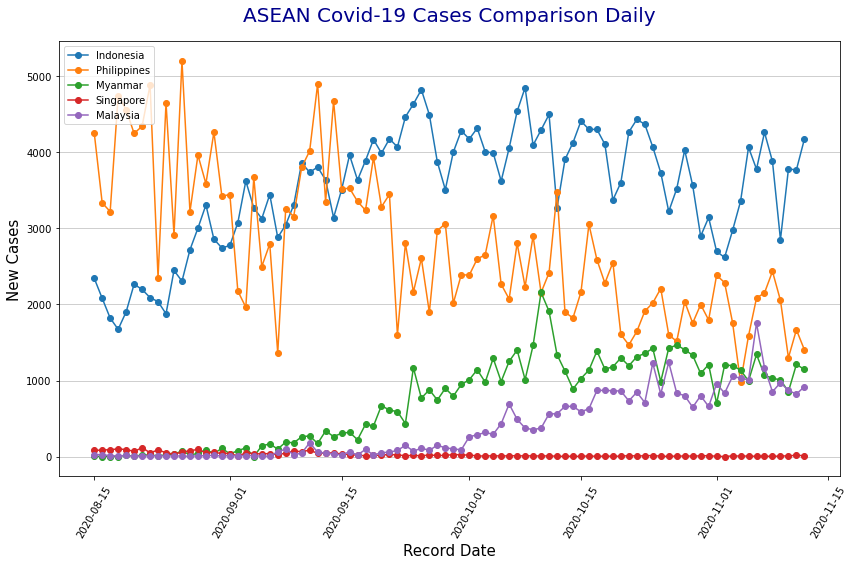

In [34]:
figure, ax=plt.subplots(figsize=(14,8))
for country in high5_countries:
    data_country=df_timeline_covid_denormalize_90day['name']== country
    x=df_timeline_covid_denormalize_90day[data_country]['last_update']
    y=df_timeline_covid_denormalize_90day[data_country]['new_cases']
    ax.plot(x, y, label=country, marker='o')

ax.legend(loc='upper left')
plt.xlabel('Record Date', fontsize=15)
plt.ylabel('New Cases', fontsize=15)
plt.grid(axis='y', alpha=0.75)
plt.title('ASEAN Covid-19 Cases Comparison Daily', color='DarkBlue', fontsize=20, pad=20)
plt.xticks(rotation=60)
plt.savefig('Asean Covid19 Cases Comparison Daily.png', bbox_inches='tight')
plt.show()

#### The daily highest increase cases of Covid-19 in ASEAN is Indonesia country. This analysis was carried out by taking data on that experienced an increase in the number of cases by more than 2000 cases compared to the previous day.

In [35]:
df_timeline_covid_indonesia = df_timeline_covid_denormalize[df_timeline_covid_denormalize['country'] == 'ID'].reset_index()
df_timeline_covid_indonesia

,index,country,last_update,cases,deaths,recovered,new_cases,new_deaths,new_recovered,name,country_code,numeric,latitude,longitude
0,2078,ID,2020-11-12,452291,14933,382084,4173,97,3102,Indonesia,IDN,360,-5.0,120.0
1,2079,ID,2020-11-11,448118,14836,378982,3770,75,3241,Indonesia,IDN,360,-5.0,120.0
2,2080,ID,2020-11-10,444348,14761,375741,3779,72,3475,Indonesia,IDN,360,-5.0,120.0
3,2081,ID,2020-11-09,440569,14689,372266,2853,75,3968,Indonesia,IDN,360,-5.0,120.0
4,2082,ID,2020-11-08,437716,14614,368298,3880,74,3881,Indonesia,IDN,360,-5.0,120.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,2324,ID,2020-03-10,27,0,2,8,0,2,Indonesia,IDN,360,-5.0,120.0
247,2325,ID,2020-03-09,19,0,0,13,0,0,Indonesia,IDN,360,-5.0,120.0
248,2326,ID,2020-03-08,6,0,0,2,0,0,Indonesia,IDN,360,-5.0,120.0
249,2327,ID,2020-03-06,4,0,0,2,0,0,Indonesia,IDN,360,-5.0,120.0


In [36]:
df_timeline_covid_indonesia.shape

(251, 14)

In [37]:
df_timeline_covid_indonesia.head()

,index,country,last_update,cases,deaths,recovered,new_cases,new_deaths,new_recovered,name,country_code,numeric,latitude,longitude
0,2078,ID,2020-11-12,452291,14933,382084,4173,97,3102,Indonesia,IDN,360,-5.0,120.0
1,2079,ID,2020-11-11,448118,14836,378982,3770,75,3241,Indonesia,IDN,360,-5.0,120.0
2,2080,ID,2020-11-10,444348,14761,375741,3779,72,3475,Indonesia,IDN,360,-5.0,120.0
3,2081,ID,2020-11-09,440569,14689,372266,2853,75,3968,Indonesia,IDN,360,-5.0,120.0
4,2082,ID,2020-11-08,437716,14614,368298,3880,74,3881,Indonesia,IDN,360,-5.0,120.0


In [38]:
list_time=[]
for i in range(len(df_timeline_covid_indonesia)-1):
    if i != 0 and df_timeline_covid_indonesia.iloc[i+1]['new_cases'] != 0:  
        if df_timeline_covid_indonesia.iloc[i]['new_cases'] > df_timeline_covid_indonesia.iloc[i+1]['new_cases']*1.5:
            list_time.append(df_timeline_covid_indonesia.iloc[i]['last_update'].strftime('%w-%A')) 
data_day=collections.Counter(sorted(list_time)[2:])
data_day

Counter({'2-Tuesday': 5,
         '3-Wednesday': 2,
         '4-Thursday': 2,
         '5-Friday': 1,
         '6-Saturday': 2})

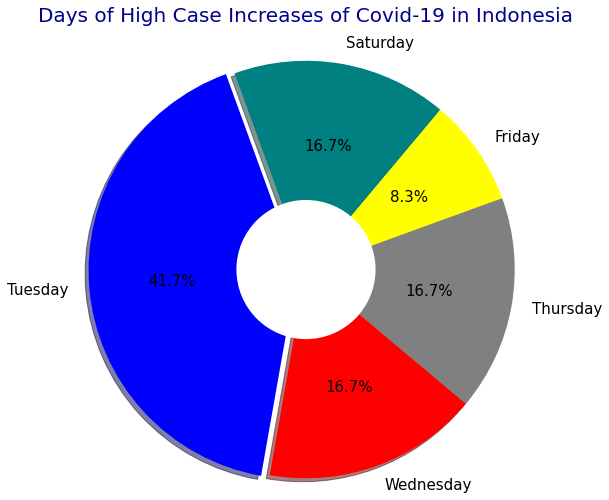

In [39]:
weekday=[]
amount=[]
for key, val in data_day.items():
    weekday.append(key[2:])
    amount.append(val)

x = weekday
y = amount
colors=[ 'blue','red','gray','yellow','teal']
centre_circle=plt.Circle((0, 0), 0.4, color='white', linewidth=0)
fig, ax=plt.subplots(figsize=(12,8))
ax.pie(y, labels=x, autopct='%.1f%%', explode = (.05, .0, 0, 0, 0), startangle=110, colors=colors, shadow=True, radius=1.2,textprops=dict(size=15))
fig.gca().add_artist(centre_circle)
ax.set_aspect('equal')
ax.set_title("Days of High Case Increases of Covid-19 in Indonesia", pad=30, size=20, color='DarkBlue')
plt.savefig('Days of High Case Increases of Covid-19 in Indonesia.png', bbox_inches='tight')
plt.show()

#### Comparative analysis of the number of deaths and the number of recovered in Indonesia.

In [40]:
last90_day=datetime.date.today() - datetime.timedelta(90)
df_timeline_covid_last90day=df_timeline_covid_denormalize[df_timeline_covid_denormalize['last_update']>=last90_day]

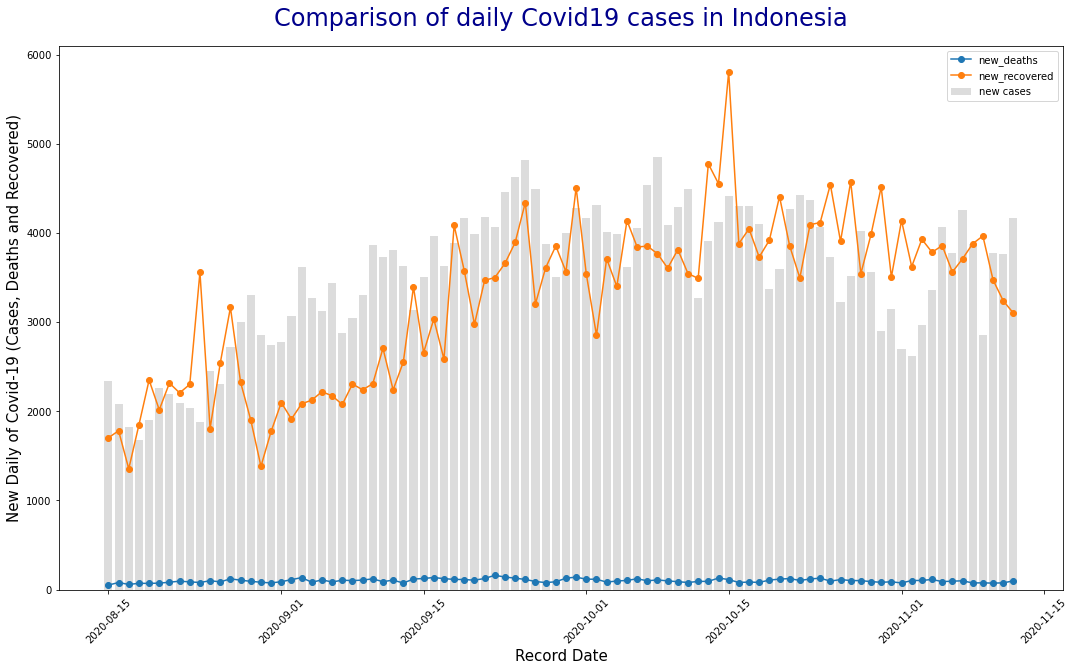

In [41]:
plt.figure(figsize=(18,10))
for cases in ['new_deaths', 'new_recovered']:
    data_country=df_timeline_covid_last90day['country']== 'ID'
    x=df_timeline_covid_last90day[data_country]['last_update']
    y=df_timeline_covid_last90day[data_country][cases]
    line=plt.plot(x, y, label=cases, marker='o')
plt.bar(x, df_timeline_covid_last90day[data_country]['new_cases'], color='gainsboro', label='new cases')
plt.legend()
plt.xlabel('Record Date', fontsize=15)
plt.ylabel('New Daily of Covid-19 (Cases, Deaths and Recovered)', fontsize=15)
plt.title('Comparison of daily Covid19 cases in Indonesia', fontsize=24, color='DarkBlue', pad=20)
plt.xticks(rotation=45)
plt.savefig('comparison of daily Covid19 cases in Indonesia.png', bbox_inches='tight')
plt.show()